# Tabla GPS

## Carga de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os

path_gps = os.path.join('datasets', 'GPS_SAN_JUAN_022024.csv')


In [ ]:

gps_column_types = {
    "CODIGOENTIDAD": "string",
    "IDLINEA": "string",
    "INTERTNO": "int64",
    "C_LD_ID (RAMAL)": "int64",
    "FILE_ID": "float64",
    "DTSN": "float64",
    "DATE_TIME": "datetime64[ns]",
    "TYPE": "int64",
    "DIRECTION": "int64",
    "LONGITUDE": "float64",
    "LATITUDE": "float64",
    "VELOCITY": "float64",
    "DISTANCE": "float64",
    "STATUS": "int64",
    "CONTROL_POINT": "int64"
}



In [ ]:
def load_data_GPS(path, columns):
    return pd.read_csv(
        path,
        dtype=columns,
        delimiter=';',
        decimal=',',
        )


In [ ]:
gps_df = load_data_GPS(path_gps, gps_column_types)

## Funciones usadas
para visualización de datos y análisis de columnas


In [ ]:

def show_histogram(dataframe, column_name, title, xlabel, ylabel, bins=50):
    """
    Muestra un histograma para una columna específica de un DataFrame.
    
    Parámetros:
        dataframe (pd.DataFrame): El DataFrame que contiene los datos.
        column_name (str): El nombre de la columna para graficar.
        title (str): El título del histograma.
        xlabel (str): La etiqueta del eje X.
        ylabel (str): La etiqueta del eje Y.
        bins (int): Número de bins para el histograma (por defecto es 50).
    """
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column_name], bins=bins, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [ ]:
def analyze_column(dataframe, column_name):
    """
    Analiza una columna de un DataFrame para verificar:
        - Si hay valores nulos.
        - Si hay valores NaN.
        - Si todos los valores podrían ser tratados como enteros sin pérdida de información.
    
    Parámetros:
        dataframe (pd.DataFrame): El DataFrame que contiene los datos.
        column_name (str): El nombre de la columna a analizar.
    
    Retorna:
        dict: Un diccionario con los resultados del análisis.
    """
    column = dataframe[column_name]
    
    # Verificar si la columna contiene valores nulos o NaN
    contains_nulls = column.isnull().any()
    contains_nans = column.isna().any()

    # Verificar si la columna es de tipo entero
    if column.dtype in ['int64', 'int32', 'int16', 'int8']:
        all_integers = True
    elif column.dtype in ['float64', 'float32', 'float16']:
        # Si es tipo float, verificamos si todos los valores son enteros
        all_integers = column.dropna().apply(lambda x: x.is_integer()).all()
    else:
        all_integers = False
    
    result = {
        'column_name': column_name,
        'contains_nulls': contains_nulls,
        'contains_nans': contains_nans,
        'all_integers': all_integers
    }
    
    return result


In [ ]:
column_names = gps_df.columns.tolist()
analysis_results = []

# Iterar sobre cada columna en column_names y aplicar analyze_column
for column in column_names:
    result = analyze_column(gps_df, column)
    analysis_results.append(result)

# Convertir la lista de resultados en un DataFrame
analysis_df = pd.DataFrame(analysis_results)

# Mostrar el DataFrame
analysis_df

,column_name,contains_nulls,contains_nans,all_integers
0,codigoentidad,False,False,True
1,idlinea,True,True,True
2,interno,False,False,True
3,c_ld_Id,False,False,True
4,file_id,False,False,True
5,FILENAME,False,False,False
6,record_type,False,False,True
7,dtsn,False,False,True
8,date_time,False,False,False
9,TYPE,False,False,True


In [ ]:
gps_df.head()

,codigoentidad,idlinea,interno,c_ld_Id,file_id,FILENAME,record_type,dtsn,date_time,TYPE,direction,device,longitude,latitude,velocity,distance,status,c_control_point
0,251,NaN,21,0,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929896,02/02/2024 09:55:35,5,255,4344,-68.54042,-31.54441,0,0,64,1
1,251,NaN,21,0,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929899,02/02/2024 09:55:42,3,255,4344,-68.54042,-31.54441,0,0,8,2
2,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929903,02/02/2024 09:55:47,7,255,4344,-68.54042,-31.54441,0,0,64,3
3,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929905,02/02/2024 09:59:43,3,1,4344,-68.54028,-31.54454,9,0,8,4
4,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929906,02/02/2024 10:03:43,3,1,4344,-68.53884,-31.54263,37,1075,8,5


## Visualizaciones


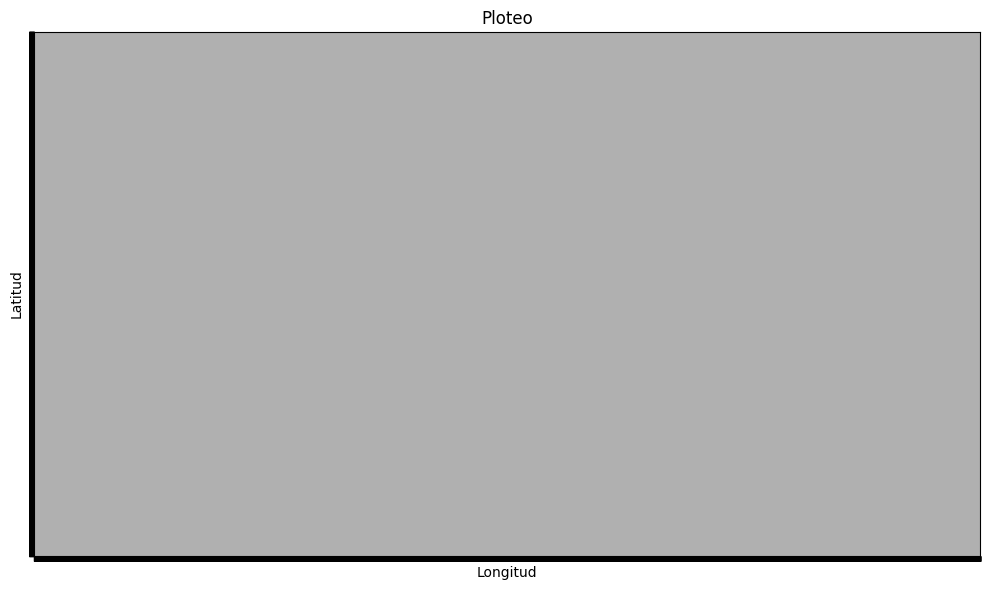

In [ ]:
lat_min, lat_max = gps_df['latitude'].min(), gps_df['latitude'].max()
lon_min, lon_max = gps_df['longitude'].min(), gps_df['longitude'].max()


plt.figure(figsize=(10,6))
plt.scatter(gps_df['longitude'], gps_df['latitude'], c='blue', marker='o', alpha=0.3, s=10)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.title('Ploteo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.grid(True)
plt.show()
